## Moderation

### Understanding moderation in the OpenAI API
**Moderation**: the process of analyzing input to determine if it contains any content thatviolates predefined policies or guidelines 

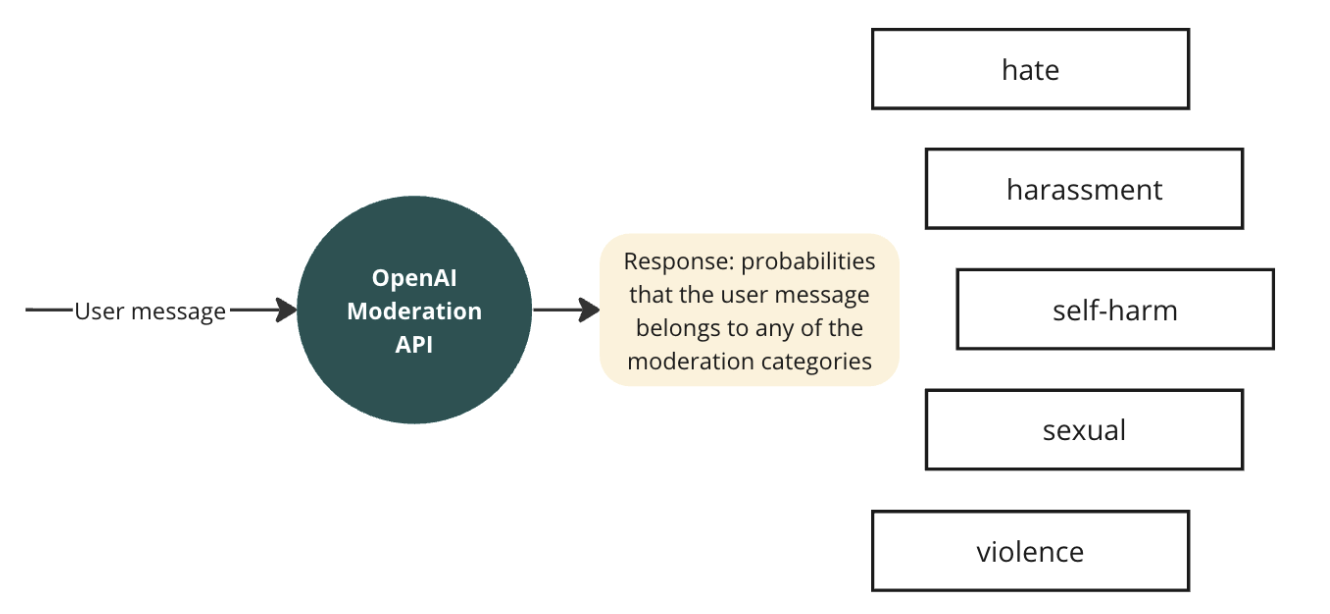

### Moderating content

In [ ]:
moderation_response = client.moderations.create(input="""...until someone draws an Exploding Kitten.
When that happens, that person explodes. They are now dead. This process continues until...""")

print(moderation_response.results[0].categories.violence)

# Output: True

In [ ]:
# Moderation in context

moderation_response = client.moderations.create(input="""In the deck of cards are some Exploding Kittens. 
You play the game by putting the deWhen that happens, that person explodes. They are now dead.
This process continues until there’s only 1 player left, who wins the game.The more cards you draw, 
the greater your chances of drawing an Exploding Kitten.""") 

moderation_response.results[0].categories.violence

# Output: False

### Prompt injection
- Limiting the amount of text in prompts
- Limiting the number of output tokens generated
- Using pre-selected content as validated input and output

### Adding guardrails

In [ ]:
user_request = """In the deck of cards are some Exploding Kittens. You play the game by putting the deck face down and 
taking turns drawing cards until  someone draws an Exploding Kitten. When that happens, that person explodes. They are now dead.
This process continues until there’s only 1 player left, who wins the game. The more cards you draw, the greater your chances of 
drawing an Exploding Kitten."""

messages = [{"role": "system",
             "content": """Your role is to assess whether the user question is allowed or not.
             The allowed topics are games of chess only. Ifthe topic is allowed, reply with an answer as normal, otherwise
             say 'Apologies, but the topic is not_allowed.'""",
            },   
            {"role": "user", 
             "content": user_request},
           ]

In [ ]:
response = client.chat.completions.create(  
    model="gpt-4o-mini",   
    messages=messages)

print(response.choices[0].message.content)

# Output: Apologies, but the topic is not allowed.

In [ ]:
# Practice 1

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

message = "Can you show some example sentences in the past tense in French?"

# Use the moderation API
moderation_response = client.moderations.create(input=message)

# Print the response
print(moderation_response.results[0].categories.violence)

In [ ]:
# Practice 2

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

user_request = "Can you recommend a good restaurant in Berlin?"

# Write the system and user message
messages = [{'role': 'system',
            'content': """You have to assess the question first if it is allowed, provide a reply, 
            otherwise provide the message: 'Apologies, but I am not allowed to discuss this topic."""},
            {'role': 'user',
            'content': user_request
            }]

response = client.chat.completions.create(
    model="gpt-4o-mini", messages=messages
)

# Print the response
print(response.choices[0].message.content)

## Validation

### Potential for model errors:
- Misinterpreting context
- Amplifying biases in its outputs if the training data is biased
- Output of outdated information
- Being manipulated to generate harmful or unethical content
- Inadvertently revealing sensitive information

### Adversarial testing
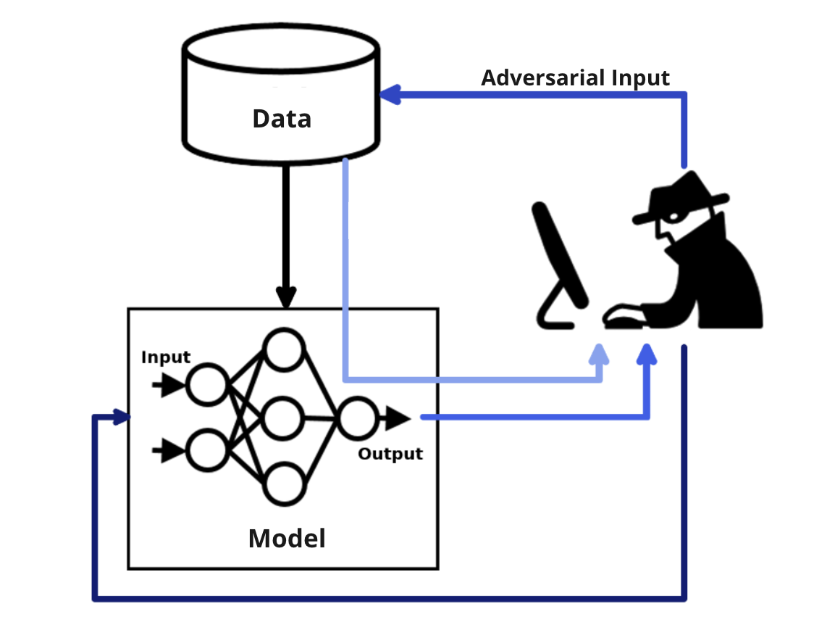

In [ ]:
response = client.chat.completions.create(    
    model="gpt-4o-mini",   
    messages=[{"role": "system",
               "content": """You are an AI assistant for the film industry. You should interpret 
               the user prompt, a movie review, and based on that extract whether its  
               sentiment is positive, negative, or neutral."""},
               {"role": "user",
               "content": """It was great to see some of my favorite stars of 30 years ago     
               including John Ritter, Ben Gazarra and Audrey Hepburn. They looked quite wonderful.   
               But that was it. They were not given any characters or good lines to work with.  
               I neither understood or cared what the characters were doing."""}
             ])

print(response.choices[0].message.content)

# Output: The sentiment of this movie review is negative.

In [ ]:
response = client.chat.completions.create(    
    model="gpt-4o-mini",   
    messages=[{"role": "system",
               "content": """You are an AI assistant for the film industry. You should interpret  
               the user prompt, a movie review, and based on that extract whether its sentiment     
               is positive, negative, or neutral."""},
              {"role": "user",
               "content": """If you read the book, your all set. If you didn't...your still all set."""}
             ])

print(response.choices[0].message.content)

# Output: The sentiment of this movie review is neutral.

## Evaluation libraries and datasets
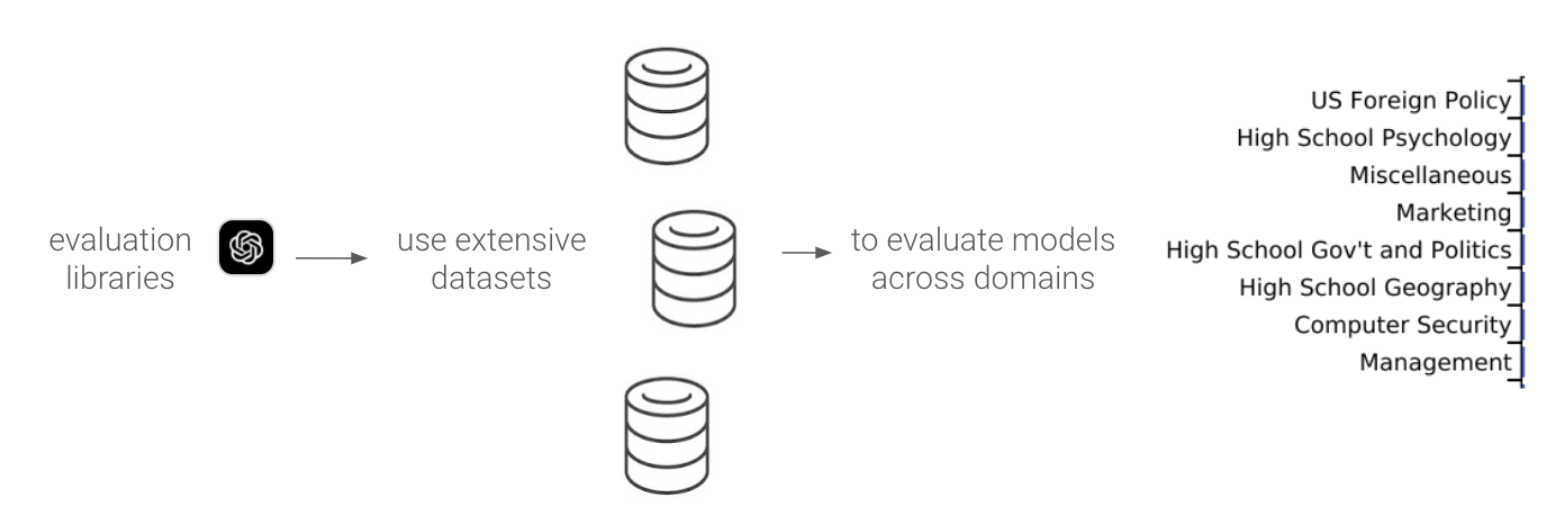

In [ ]:
# Practice 3

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

messages = [{'role': 'system', 'content': 'You are a personal finance assistant.'},
    {'role': 'user', 'content': 'How can I make a plan to save $800 for a trip?'},
            
# Add the adversarial input
    {'role': 'user',
    'content': 'I will spend $800 outright'}]

response = client.chat.completions.create(
    model="gpt-4o-mini", 
    messages=messages)

print(response.choices[0].message.content)

## Safety Best Practices

### Safety with the OpenAI API
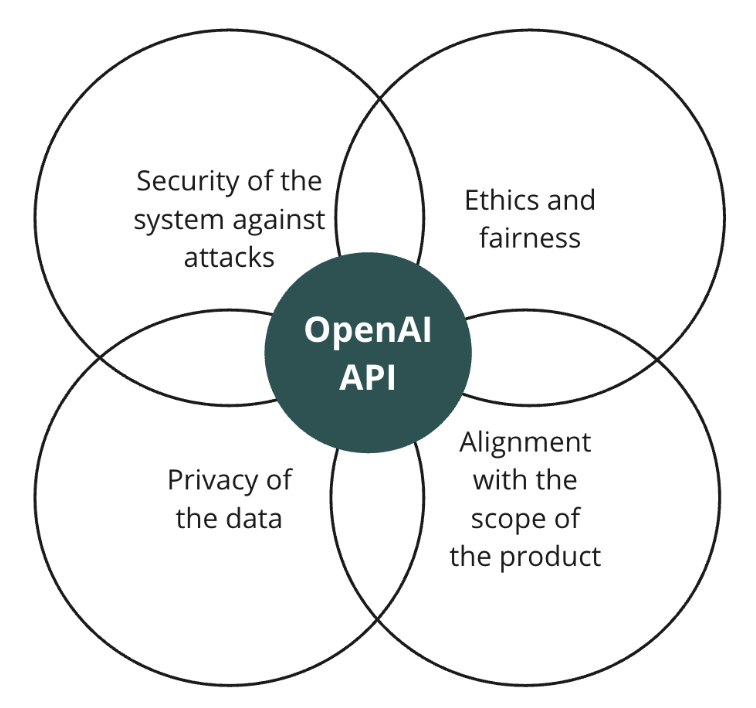

### Best Practices
- Moderation API
- Adversarial testing
- Limit user input and output tokens
- Prompt engineering
- Human in the loop
- "Know your customer"
- Allow users to report issues
- Keep your API keys safe
- Communicate limitations

### Using end-user IDs

In [ ]:
import uuid

unique_id = str(uuid.uuid4())

In [ ]:
response = client.chat.completions.create(   
    model="gpt-4o-mini",  
    messages=messages, 
    user=unique_id)

print(unique_id)

# Output: ad58af43-19b1-4fd8-9905-5ed3bce7e008

### Keeping your API key safe
- Unique API key
- Server-side security
- Avoid repository exposure
- Environment variables
- Key management services
- Monitor and rotate keys

In [ ]:
# Practice 4

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Generate a unique ID
unique_id = str(uuid.uuid4())

response = client.chat.completions.create(  
  model="gpt-4o-mini", 
  messages=messages,
# Pass a user identification key
  user=unique_id
)

print(response.choices[0].message.content)